# What Factors Sell a Car?

You are an analyst at Crankshaft List. Hundreds of free vehicle ads appear on your website every day. You need to study data sets over the past few years and determine the factors that influence the price of a vehicle.

## Pra-pemrosesan

In [1]:
# Muat semua library
import pandas as pd


### Memuat Data

In [2]:
# Muat file data menjadi DataFrame
data = pd.read_csv('/datasets/vehicles_us.csv')

### Mengeksplorasi Data Awal

Your *dataset* contains the following columns:


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — vehicle mileage when the ad was shown
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — date the ad was posted
- `days_listed` — number of days the ad was shown until it was removed


In [3]:
# tampilkan informasi/rangkuman umum tentang DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# tampilkan sampel data
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


From the sample data displayed randomly, there are missing values ​​in several columns. However, further investigation is needed into the missing values, either by deleting some data or by replacing the missing data values.

In [5]:
data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

From the results displayed, there are several data types that are not as they should be, for example: `date_posted` has type *object* which should have type *datetime* and in `model_year` which should be int64 not float64.

From the initial observation results, there are several missing values ​​in 5 columns, such as; `model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd` However, there is 1 column namely `is_4wd` which has the most missing values ​​in almost 50% of the dataset. Thus, further investigation needs to be carried out, such as changing or filling in missing values ​​with new values, because the large number of missing values ​​is very risky if we delete data. After all, it will have an impact on the final results later.

In [6]:
data.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

### Conclusion and Next Steps


Before carrying out further analysis, we will change the data type to the proper type:
- `model_year` = int64
- `odometer` = int64
- `cylinders` = int64
- `is_4wd` = boolean
- `date_posted` = datetime64

Once all data types are deemed suitable, we will carry out further analysis of missing values ​​in several columns using several methods.

## Addressing Missing Values ​​(If Any)

In [7]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [8]:
#is_4wd
data.is_4wd.unique()

array([ 1., nan])

In [9]:
data['is_4wd'] = data['is_4wd'].fillna(0)

In [10]:
data.is_4wd.unique()

array([1., 0.])

In [11]:
data['is_4wd'] = (data['is_4wd']).astype(int)
data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd            int64
date_posted      object
days_listed       int64
dtype: object

In [12]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28


In [13]:
data.loc[data['is_4wd'] == 0, 'is_4wd'] = False
data.loc[data['is_4wd'] == 1, 'is_4wd'] = True
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


In [14]:
#cylinders
grouped_by_model = data.groupby('model').agg({'model_year': 'median', 'cylinders': 'median'})
grouped_by_model

,model_year,cylinders
model,,
acura tl,2007.0,6.0
bmw x5,2010.0,6.0
buick enclave,2012.0,6.0
cadillac escalade,2009.0,8.0
chevrolet camaro,2013.0,6.0
...,...,...
toyota sienna,2008.0,6.0
toyota tacoma,2010.0,6.0
toyota tundra,2009.0,8.0


In [15]:
data.model.unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [16]:
grouped_by_model.loc[grouped_by_model.index == 'bmw x5', 'model_year'][0]

2010.0

In [17]:
for model in data['model'].unique():
    data.loc[(data['model'] == model) & (data['model_year'].isna()), 'model_year'] = \
    grouped_by_model.loc[grouped_by_model.index == model, 'model_year'][0]
data.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [18]:
for model in data['model'].unique():
    data.loc[(data['model'] == model) & (data['cylinders'].isna()), 'cylinders'] = \
    grouped_by_model.loc[grouped_by_model.index == model, 'cylinders'][0]
data.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [19]:
#paint_color
data.paint_color.unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [20]:
#untuk paint_color missing value diganti jadi unknown (seperti kasus TA sprint1)
data['paint_color'] = data['paint_color'].fillna('unknown')
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


In [21]:
data.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [22]:
#odometer
#cek dengan condition
grouped_by_condition = data.groupby('condition').agg({'odometer': 'median'})
grouped_by_condition


,odometer
condition,
excellent,104230.0
fair,181613.0
good,129000.0
like new,72982.5
new,8002.0
salvage,142673.5


In [23]:
for condition in data['condition'].unique():
    data.loc[(data['condition'] == condition) & (data['odometer'].isna()), 'odometer'] = \
    grouped_by_condition.loc[grouped_by_condition.index == condition, 'odometer'][0]
data.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## Fixed Data Type

In [24]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


In [25]:
data.dropna(inplace=True)

In [26]:
data['odometer'] = (data['odometer']).astype(int)
data['odometer'].dtype

dtype('int64')

In [27]:
data['model_year'] = (data['model_year']).astype(int)
data['model_year'].dtype

dtype('int64')

In [28]:
data['cylinders'] = pd.to_numeric(data['cylinders']).astype(int)
data['cylinders'].dtype

dtype('int64')

In [29]:
data['date_posted'] = pd.to_datetime(data['date_posted'])
data['date_posted'].dtype

dtype('<M8[ns]')

In [93]:
data['is_4wd'] = (data['is_4wd']).astype(bool)
data.dtypes

price                         int64
model_year                    int64
model                        object
condition                    object
cylinders                     int64
fuel                         object
odometer                      int64
transmission                 object
type                         object
paint_color                  object
is_4wd                         bool
date_posted          datetime64[ns]
days_listed                   int64
year_posted                   int64
month_posted                  int64
day_posted                    int64
age                           int64
average_mileage             float64
condition_numeric             int64
dtype: object

In [31]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17


In [32]:
data.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

## Improve Data Quality

In [33]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 
data['year_posted'] = data['date_posted'].dt.year
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019


In [34]:
data['month_posted'] = data['date_posted'].dt.month
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,3
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4


In [35]:
data['month_posted'] = data['date_posted'].dt.month
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,3
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4


In [36]:
data['day_posted'] = data['date_posted'].dt.day
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,23
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,19
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,7
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,3,22
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,2


In [37]:
# Tambahkan usia kendaraan saat iklan ditayangkan
data['age'] = data['year_posted'] - data['model_year']

In [38]:
data.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,23,7
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,19,7
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,7,6
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,3,22,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,2,2
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,6,20,4
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018,12,27,3
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2019,1,7,6
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,2018,7,16,6
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2019,2,15,11


In [39]:
#if age = 0, replace to 1
data.loc[data['age'] == 0, 'age'] = 1


In [40]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
data['average_mileage'] = data['odometer'] / data['age']
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,age,average_mileage
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,23,7,20714.285714
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,19,7,12672.142857
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,7,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,3,22,16,11350.812500
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,2,2,40451.500000


In [41]:
data.describe()

,price,model_year,cylinders,odometer,days_listed,year_posted,month_posted,day_posted,age,average_mileage
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,6.121067,115199.007278,39.55476,2018.307462,6.628491,15.449491,8.555672,18930.819247
std,10040.803015,6.099381,1.657457,60484.868232,28.20427,0.461447,3.474134,8.736521,6.057829,16268.508904
min,1.000000,1908.000000,3.000000,0.000000,0.00000,2018.000000,1.000000,1.000000,1.000000,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,19.00000,2018.000000,3.000000,8.000000,4.000000,10423.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,33.00000,2018.000000,7.000000,15.000000,8.000000,14982.500000
75%,16839.000000,2014.000000,8.000000,147821.000000,53.00000,2019.000000,10.000000,23.000000,12.000000,21800.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,2019.000000,12.000000,31.000000,110.000000,373200.000000


In [42]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
data.condition.unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [43]:
dict_condition = {"new" : 5, "like new" : 4, "excellent" : 3, "good" : 2, "fair" : 1, "salvage" : 0}

In [44]:
data['condition_numeric'] = data['condition'].replace(dict_condition)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,age,average_mileage,condition_numeric
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,23,7,20714.285714,2
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,19,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,7,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,3,22,16,11350.812500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,2,2,40451.500000,3


## Checking Clean Data

In [45]:
# tampilkan informasi/rangkuman umum tentang DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int64         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  object        
 4   cylinders          51525 non-null  int64         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  int64         
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  bool          
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  year_posted        51525 non-null  int64         
 14  month_

In [46]:
# tampilkan sampel data 
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,age,average_mileage,condition_numeric
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,23,7,20714.285714,2
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,19,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,7,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,3,22,16,11350.812500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,2,2,40451.500000,3


## Study Core Parameters

- The parameters are
- Price
- Vehicle age when the ad is displayed
- Mileage
- Number of cylinders
- Condition

In [47]:
#Library for visualization
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'condition_numeric'}>]], dtype=object)

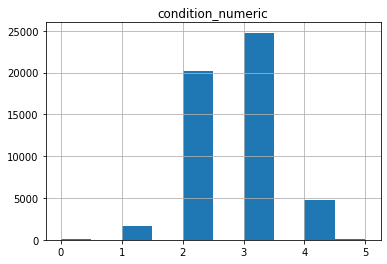

In [48]:
data.hist('condition_numeric')

,price
count,51525.000000
mean,12132.464920
std,10040.803015
min,1.000000
25%,5000.000000
50%,9000.000000
75%,16839.000000
max,375000.000000


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

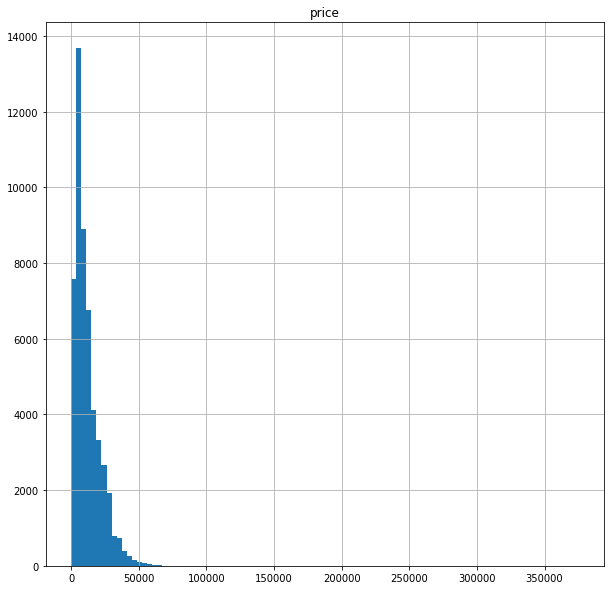

In [49]:
#Price
display(data.price.describe().to_frame())
data.hist('price', bins=100, figsize=(10, 10))

,age
count,51525.000000
mean,8.555672
std,6.057829
min,1.000000
25%,4.000000
50%,8.000000
75%,12.000000
max,110.000000


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

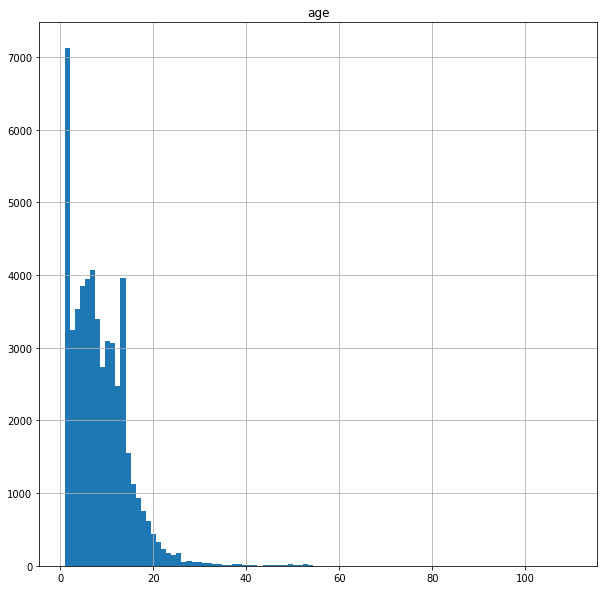

In [51]:
#age 
display(data.age.describe().to_frame())
data.hist('age', bins=100, figsize=(10, 10))

,odometer
count,51525.000000
mean,115199.007278
std,60484.868232
min,0.000000
25%,75668.000000
50%,110908.000000
75%,147821.000000
max,990000.000000


array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

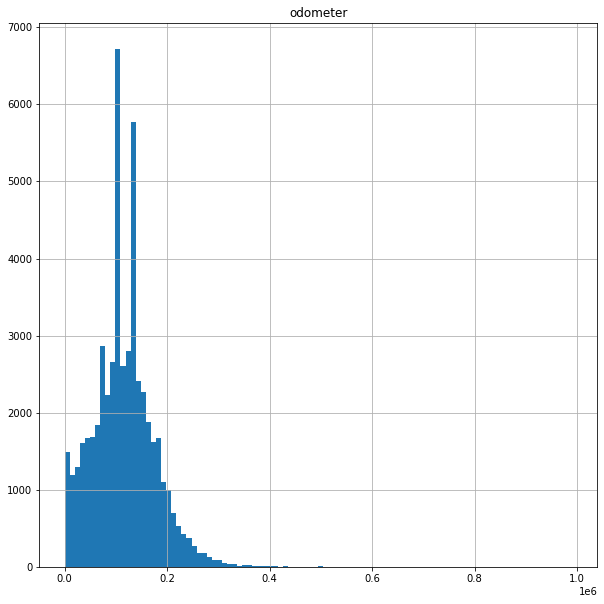

In [52]:
#odometer
display(data.odometer.describe().to_frame())
data.hist('odometer', bins=100, figsize=(10, 10))


array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

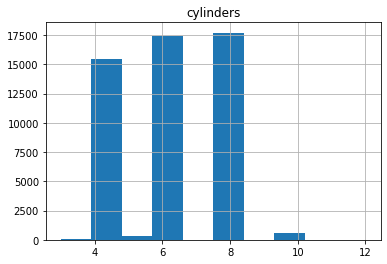

In [53]:
#cylinders
data.hist('cylinders')

## Study and Handle Outliers


In [54]:
# Tentukan batas bawah outlier 
columns = ['price', 'cylinders', 'odometer'] 
lower_bounds = []
for column in columns:
    lower_bound = data[column].describe()['25%'] - (1.5 * (data[column].describe()['75%'] - data[column].describe()['25%']))
    lower_bounds.append(lower_bound)
lower_bounds

[-12758.5, -2.0, -32561.5]

In [55]:
# Tentukan batas atas outlier 
columns = ['price', 'cylinders', 'odometer'] 
upper_bounds = []
for column in columns:
    upper_bound = data[column].describe()['25%'] + (1.5 * (data[column].describe()['75%'] - data[column].describe()['25%']))
    upper_bounds.append(upper_bound)
upper_bounds

[22758.5, 10.0, 183897.5]

In [56]:
for n, column in enumerate(columns):
    print(column)
    print(n)

price
0
cylinders
1
odometer
2


In [57]:
data.shape

(51525, 19)

In [58]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
data_without_outlier = data.copy()
for n, column in enumerate(columns):
    data_without_outlier = data_without_outlier[(data_without_outlier[column] >= lower_bounds[n]) & (data_without_outlier[column] <= upper_bounds[n])]
data_without_outlier.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,age,average_mileage,condition_numeric
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,23,7,20714.285714,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,7,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,3,22,16,11350.812500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,2,2,40451.500000,3
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,6,20,4,14488.500000,3
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018,12,27,3,26404.000000,3
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2019,1,7,6,18245.500000,3
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,2018,7,16,6,17362.333333,3
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2019,2,15,11,13381.000000,3
10,19500,2011,chevrolet silverado 1500,excellent,8,gas,128413,automatic,pickup,black,True,2018-09-17,38,2018,9,17,7,18344.714286,3


## Learn Core Parameters Without Outliers

,price
count,38540.000000
mean,9560.145926
std,5606.926723
min,1.000000
25%,5000.000000
50%,8500.000000
75%,13900.000000
max,22745.000000


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

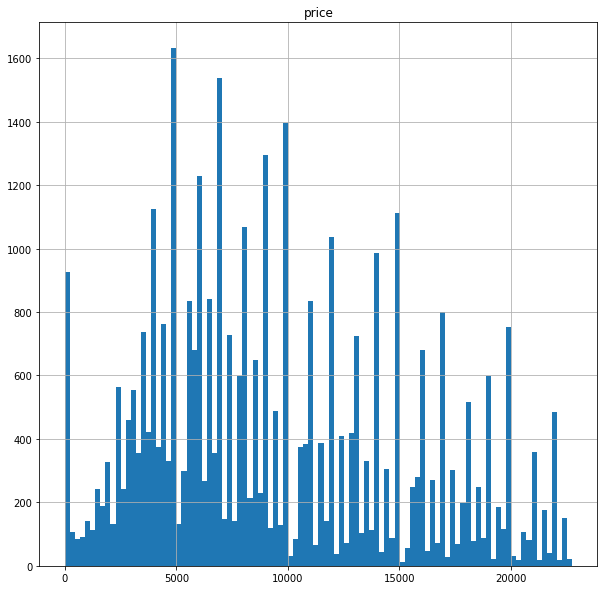

In [59]:
#price
display(data_without_outlier.price.describe().to_frame())
data_without_outlier.hist('price', bins=100, figsize=(10, 10))

,odometer
count,38540.000000
mean,107380.637961
std,42492.836993
min,0.000000
25%,82000.000000
50%,108576.500000
75%,135978.750000
max,183859.000000


array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

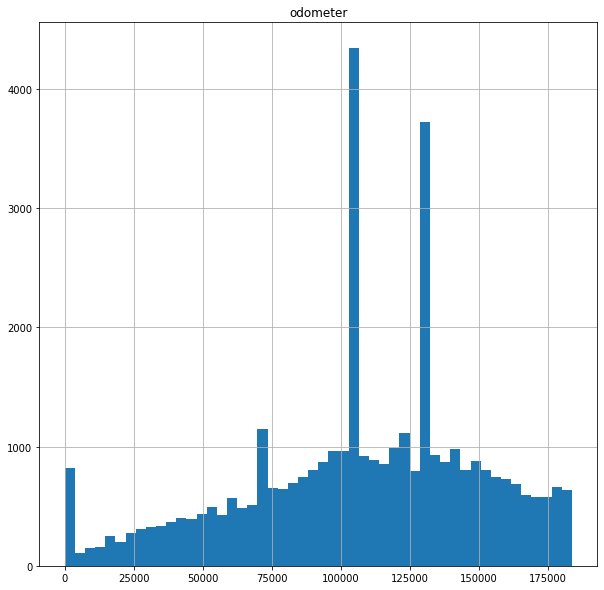

In [60]:
#odometer
display(data_without_outlier.odometer.describe().to_frame())
data_without_outlier.hist('odometer', bins=50, figsize=(10, 10))

,cylinders
count,38540.000000
mean,5.863415
std,1.664222
min,3.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,10.000000


array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

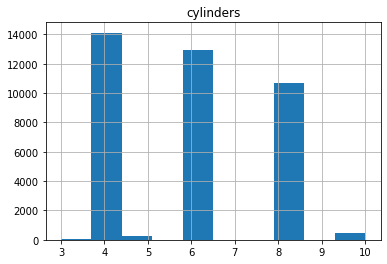

In [61]:
#cylinders
display(data_without_outlier.cylinders.describe().to_frame())
data_without_outlier.hist('cylinders')

## Ad Validity Period

Advertisements whose value is below Q1 can be said to be broadcast relatively quickly, while advertisements whose value is above Q3 (above 50 days) are aired for a relatively long time.

In [62]:
data[['days_listed']].describe()

,days_listed
count,51525.00000
mean,39.55476
std,28.20427
min,0.00000
25%,19.00000
50%,33.00000
75%,53.00000
max,271.00000


array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

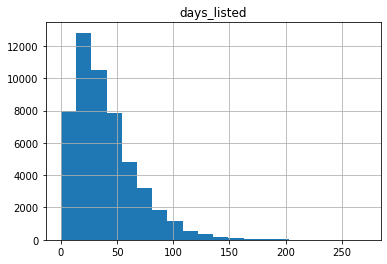

In [63]:
data[['days_listed']].hist(bins=20)

## Average Price of Each Type of Vehicle

In [64]:
data_without_outlier.type.unique()

array(['SUV', 'sedan', 'pickup', 'truck', 'coupe', 'van', 'wagon',
       'hatchback', 'mini-van', 'convertible', 'other', 'offroad', 'bus'],
      dtype=object)

In [65]:
data_grouped = data_without_outlier.groupby(['type']).agg({"model" : "count"})\
                .rename(columns = {"model" : "jumlah_iklan"}).sort_values(by = 'jumlah_iklan', ascending=False)
data_grouped

,jumlah_iklan
type,
sedan,11192
SUV,9832
truck,7372
pickup,4052
coupe,1633
wagon,1318
mini-van,977
hatchback,954
van,494


<AxesSubplot:xlabel='type'>

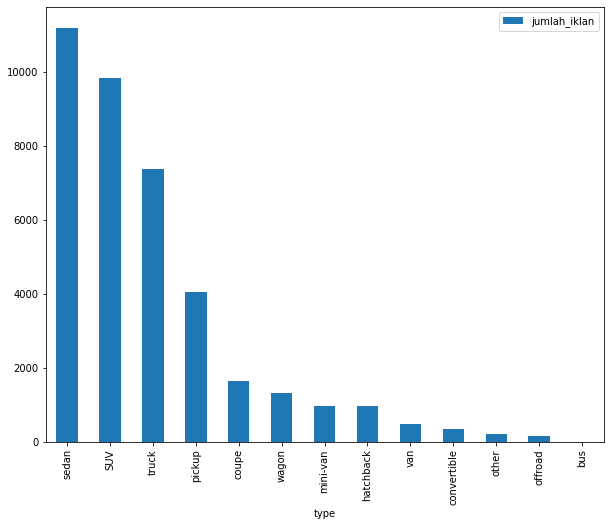

In [66]:
data_grouped.plot(kind='bar', figsize=(10, 8))

In [67]:
#Harga rata-rata
data_grouped = data_without_outlier.groupby(['type']).agg({"model" : "count", "price" : 'median'})\
                .rename(columns = ({"model" : "jumlah_iklan", "price" : 'median_price'}))\
                .sort_values(by = 'median_price', ascending=False)
data_grouped

,jumlah_iklan,median_price
type,,
truck,7372,12995.0
pickup,4052,11800.0
offroad,144,11450.0
bus,5,10000.0
convertible,356,9995.0
coupe,1633,9000.0
SUV,9832,8900.0
other,211,8900.0
wagon,1318,7995.0


<AxesSubplot:xlabel='type'>

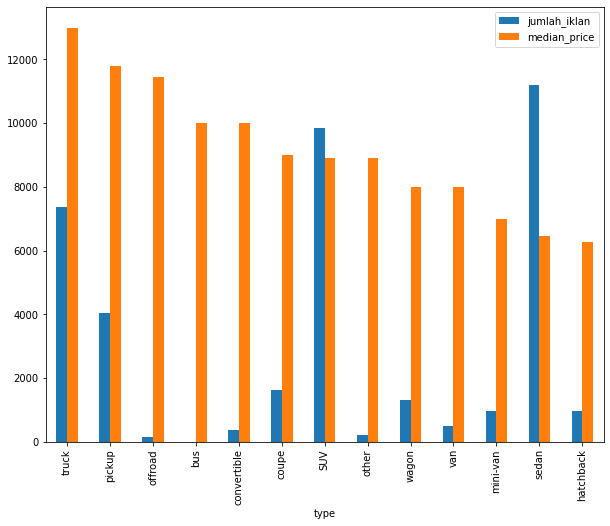

In [68]:
data_grouped.plot(kind='bar', figsize=(10, 8))

## Price Factor

In [69]:
data_sedan = data_without_outlier[data_without_outlier['type'] == 'sedan']
data_sedan

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,age,average_mileage,condition_numeric
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,7,6,18333.333333,4
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,2,2,40451.500000,3
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,6,20,4,14488.500000,3
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018,12,27,3,26404.000000,3
11,8990,2012,honda accord,excellent,4,gas,111142,automatic,sedan,grey,False,2019-03-28,29,2019,3,28,7,15877.428571,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2018,10,3,5,17627.200000,4
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2018,11,14,16,11343.750000,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,2018,11,15,9,14222.222222,3
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,2018,7,2,5,27914.600000,2


In [70]:
data_sedan.transmission.unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [71]:
data_sedan.transmission.value_counts()

automatic    10560
manual         504
other          128
Name: transmission, dtype: int64

In [72]:
data_sedan.paint_color.value_counts()

unknown    2037
silver     1858
black      1673
grey       1497
white      1401
blue       1129
red         874
custom      275
brown       233
green       166
purple       23
yellow       17
orange        9
Name: paint_color, dtype: int64

In [73]:
data_sedan_color_boxplot = data_sedan.loc[~data_sedan['paint_color'].isin(['purple', 'yellow', 'orange'])]
data_sedan_color_boxplot.paint_color.value_counts()

unknown    2037
silver     1858
black      1673
grey       1497
white      1401
blue       1129
red         874
custom      275
brown       233
green       166
Name: paint_color, dtype: int64

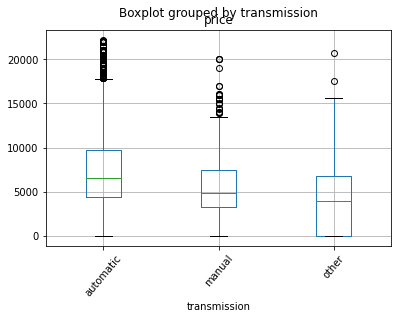

In [74]:
#boxplot transmission Sedan
data_sedan.boxplot('price', by = 'transmission')
plt.xticks(rotation = 50)
plt.show()

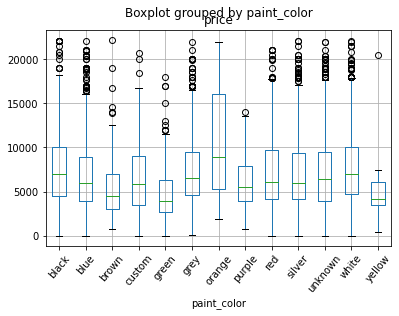

In [75]:
#boxplot color Sedan
data_sedan.boxplot('price', by = 'paint_color')
plt.xticks(rotation = 50)
plt.show()

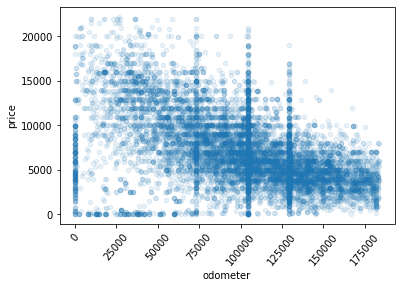

In [76]:
#scatter untuk data numerik : odometer
data_sedan.plot(x= 'odometer', y= 'price', kind= 'scatter', alpha= 0.1, ax= plt.subplot(1,1,1))

plt.xticks(rotation = 50)
plt.show()


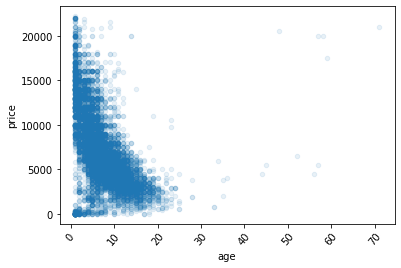

In [77]:
#scatter untuk data numerik : age
data_sedan.plot(x= 'age', y= 'price', kind= 'scatter', alpha= 0.1, ax= plt.subplot(1,1,1))

plt.xticks(rotation = 50)
plt.show()

In [78]:
#SUV
data_SUV = data_without_outlier[data_without_outlier['type'] == 'SUV']
data_SUV

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,age,average_mileage,condition_numeric
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,23,7,20714.285714,2
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2019,1,7,6,18245.500000,3
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,2018,7,16,6,17362.333333,3
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2019,2,15,11,13381.000000,3
14,12990,2009,gmc yukon,excellent,8,gas,132285,automatic,SUV,black,True,2019-01-31,24,2019,1,31,10,13228.500000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,2012,chevrolet traverse,good,6,gas,144500,automatic,SUV,unknown,True,2019-03-05,1,2019,3,5,7,20642.857143,2
51496,4999,2002,toyota 4runner,excellent,6,gas,177901,automatic,SUV,unknown,True,2018-05-26,59,2018,5,26,16,11118.812500,3
51500,6995,2012,buick enclave,excellent,6,gas,157000,automatic,SUV,white,True,2018-08-04,17,2018,8,4,6,26166.666667,3
51502,7995,2011,chevrolet equinox,like new,4,gas,111088,automatic,SUV,unknown,False,2019-04-01,175,2019,4,1,8,13886.000000,4


In [79]:
data_SUV.transmission.unique()

array(['automatic', 'other', 'manual'], dtype=object)

In [80]:
data_SUV.transmission.value_counts()

automatic    9273
manual        408
other         151
Name: transmission, dtype: int64

In [81]:
data_SUV.paint_color.value_counts()

unknown    1760
black      1690
white      1519
silver     1297
grey        960
blue        849
red         727
green       362
brown       291
custom      255
orange       69
yellow       27
purple       26
Name: paint_color, dtype: int64

In [82]:
data_SUV_color_boxplot = data_SUV.loc[~data_SUV['paint_color'].isin(['orange', 'yellow', 'purple'])]
data_SUV_color_boxplot.paint_color.value_counts()

unknown    1760
black      1690
white      1519
silver     1297
grey        960
blue        849
red         727
green       362
brown       291
custom      255
Name: paint_color, dtype: int64

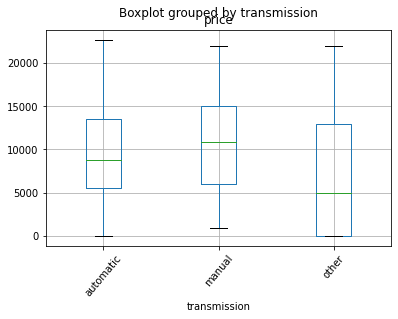

In [83]:
#boxplot transmission SUV
data_SUV.boxplot('price', by = 'transmission')
plt.xticks(rotation = 50)
plt.show()

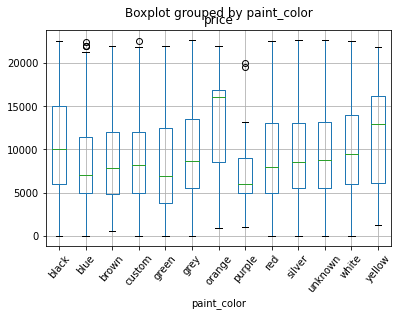

In [84]:
#boxplot color SUV
data_SUV.boxplot('price', by = 'paint_color')
plt.xticks(rotation = 50)
plt.show()

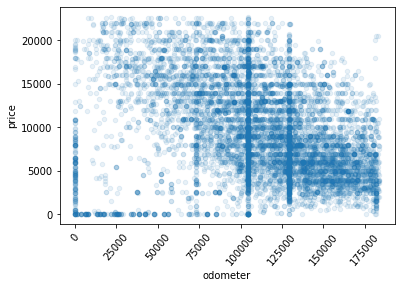

In [85]:
#scatter untuk data numerik : odometer
data_SUV.plot(x= 'odometer', y= 'price', kind= 'scatter', alpha= 0.1, ax= plt.subplot(1,1,1))

plt.xticks(rotation = 50)
plt.show()

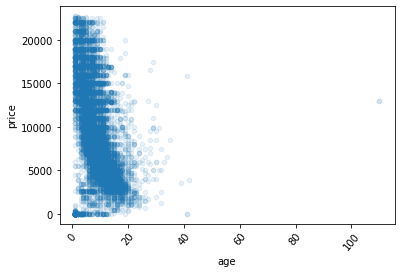

In [86]:
#scatter untuk data numerik : age
data_SUV.plot(x= 'age', y= 'price', kind= 'scatter', alpha= 0.1, ax= plt.subplot(1,1,1))

plt.xticks(rotation = 50)
plt.show()

In [87]:
#cek korelasi sedan
data_sedan.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,year_posted,month_posted,day_posted,age,average_mileage,condition_numeric
price,1.000000,0.555320,-0.078324,-0.476844,0.018060,-0.006644,0.012608,-0.015223,0.004827,-0.550044,0.322329,0.263745
model_year,0.555320,1.000000,-0.169796,-0.457586,0.065436,-0.008972,0.010771,-0.018801,0.013148,-0.994453,0.517607,0.253638
cylinders,-0.078324,-0.169796,1.000000,0.087974,0.222965,0.002241,-0.001190,-0.006279,-0.012466,0.171553,-0.082285,-0.055021
odometer,-0.476844,-0.457586,0.087974,1.000000,-0.053045,0.018323,-0.004723,0.014366,-0.012970,0.449589,0.079389,-0.334252
is_4wd,0.018060,0.065436,0.222965,-0.053045,1.000000,0.001276,-0.003629,0.006080,-0.010459,-0.062701,0.020493,0.014877
days_listed,-0.006644,-0.008972,0.002241,0.018323,0.001276,1.000000,0.012905,-0.008283,0.017802,0.010449,0.000544,-0.014283
year_posted,0.012608,0.010771,-0.001190,-0.004723,-0.003629,0.012905,1.000000,-0.819015,-0.055419,0.087745,-0.127946,0.012378
month_posted,-0.015223,-0.018801,-0.006279,0.014366,0.006080,-0.008283,-0.819015,1.000000,0.030803,-0.061917,0.107076,-0.011727
day_posted,0.004827,0.013148,-0.012466,-0.012970,-0.010459,0.017802,-0.055419,0.030803,1.000000,-0.018543,0.008275,-0.002238
age,-0.550044,-0.994453,0.171553,0.449589,-0.062701,0.010449,0.087745,-0.061917,-0.018543,1.000000,-0.525794,-0.248677


In [88]:
data_sedan['price'].corr(data_sedan['age'])

-0.550043572841017

In [89]:
data_sedan['price'].corr(data_sedan['condition_numeric'])

0.2637448123450728

In [90]:
#cek korelasi SUV
data_SUV.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,year_posted,month_posted,day_posted,age,average_mileage,condition_numeric
price,1.000000,0.458185,-0.055952,-0.322729,0.091765,-0.013139,-0.015332,0.010413,0.009581,-0.461652,0.261259,0.187587
model_year,0.458185,1.000000,-0.308966,-0.418015,-0.098408,-0.011053,-0.001468,0.002467,-0.009583,-0.995537,0.538929,0.245270
cylinders,-0.055952,-0.308966,1.000000,0.200654,0.141048,0.008739,0.004184,-0.006548,0.005595,0.308865,-0.212459,-0.087300
odometer,-0.322729,-0.418015,0.200654,1.000000,0.061389,0.005132,0.011459,-0.012316,0.000919,0.411421,0.041430,-0.284830
is_4wd,0.091765,-0.098408,0.141048,0.061389,1.000000,-0.007055,-0.006865,-0.000852,0.015347,0.097214,-0.048150,-0.019182
days_listed,-0.013139,-0.011053,0.008739,0.005132,-0.007055,1.000000,-0.003381,-0.009344,-0.015419,0.010535,-0.015660,-0.010090
year_posted,-0.015332,-0.001468,0.004184,0.011459,-0.006865,-0.003381,1.000000,-0.817252,-0.053187,0.091117,-0.103337,-0.000367
month_posted,0.010413,0.002467,-0.006548,-0.012316,-0.000852,-0.009344,-0.817252,1.000000,0.020607,-0.075875,0.086090,0.006596
day_posted,0.009581,-0.009583,0.005595,0.000919,0.015347,-0.015419,-0.053187,0.020607,1.000000,0.004365,0.011618,-0.010132
age,-0.461652,-0.995537,0.308865,0.411421,0.097214,0.010535,0.091117,-0.075875,0.004365,1.000000,-0.544804,-0.242969


In [91]:
data_SUV['price'].corr(data_SUV['age'])

-0.46165187821406223

In [92]:
data_SUV['price'].corr(data_SUV['condition_numeric'])

0.18758727084209786

For correlation results of the two popular types of cars. Can be concluded that:
For both Sedan and SUV types, the correlation is not the same as 0, but is much closer to -1. Where there is a weak linear relationship between price, age, and distance traveled. Likewise with the condition, which is closer to 0.

## General Conclusion

In this project, there are 5 core stages of analysis to find out what factors influence the price of a vehicle.

At the data pre-processing stage, missing values ​​were found in 5 columns, namely; `model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd`. However, there is 1 column namely `is_4wd` which has the most missing values ​​in almost 50% of the dataset. Likewise, data types were changed for the five columns which previously did not match the data provided. This is necessary because it makes the process of reading data analysis easier.

After analyzing the available data, we can conclude that:
1. The length of time an ad is displayed until the ad is deleted. Advertisements whose value is below Q1 can be said to be broadcast relatively quickly, while advertisements whose value is above Q3 (above 50 days) are aired for a relatively long time.
2. Number of advertisements and average price for each type of vehicle. The two types of vehicles that dominate advertising marketing are the sedan and SUV types with a total of 10,000 or even more than 10,000 advertisements for the sedan type.
3. The factors that most influence the price of vehicles taken from each popular type of vehicle that have been found are color and transmission.
4. For correlation results of the two popular types of cars. It can be concluded that: For both Sedan and SUV types, the correlation is not the same as 0, but is much closer to -1. Where there is a weak linear relationship between price, age and distance traveled. Likewise with the condition, which is closer to 0.
5. Different methods are used in this project depending on the case. For example:
- fillna() and replace methods are used to deal with missing values.
- hist(), boxplot(), plot(), and scatterplot() methods to visualize the data we process to make it easier to read data or compare data.

However, there are still results that need to be checked further because the data visualization results still look a little strange.